# Project: Determining Mental Health from Tweets
### Tim Graf & Yanis Schärer

In [1]:
# import and define important stuff
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Task 1: Data Exploration and Processing
#### Load data

In [2]:
raw = pd.read_csv('data/Mental-Health-Twitter.csv', index_col=0)
display(raw)

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain has other ideas...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble.",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month",1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never meant to stay there.",1169875706,442,230,7,1063601,0,0


In [3]:
# drop unimportant columns
data = raw.drop(columns=['post_id','post_created','user_id','followers', 'friends', 'favourites', 'statuses', 'retweets'])
display(data)

,post_text,label
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1
2,Awake but tired. I need to sleep but my brain has other ideas...,1
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1
...,...,...
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble.",0
19997,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month",0
19998,"Ships are safe in harbor, but they were never meant to stay there.",0


#### Basic Statistics

In [4]:
print('Number of unique users:', raw['user_id'].nunique())
print(20*'-')

print('Number of samples:', len(data.index))
print('-> Of which are positive:', len(data[data['label'] == 1]))
print('-> Of which are negative:', len(data[data['label'] == 0]))
print(20*'-')

lengths = [len(nltk.word_tokenize(tweet)) for tweet in data['post_text']]
print(f'Average tweet length (characters): {data["post_text"].str.len().mean():.0f}')
print(f'Average tweet length (words): {sum(lengths)/len(lengths):.0f}')
print('Shortest tweet(s) length (characters):', data['post_text'].str.len().min())
print('-> Example:')
display(data[data['post_text'].str.len() == data['post_text'].str.len().min()][:1])
print('Longest tweet(s) length (characters):', data['post_text'].str.len().max())
print('-> Example:')
display(data[data['post_text'].str.len() == data['post_text'].str.len().max()][:1])
print('Shortest tweet(s) length (words):', min(lengths))
print('-> Example:')
display(data.loc[lengths.index(min(lengths)):lengths.index(min(lengths))])
print('Longest tweet(s) length (words):', max(lengths))
print('-> Example:')
display(data.loc[lengths.index(max(lengths)):lengths.index(max(lengths))])

Number of unique users: 72
--------------------
Number of samples: 20000
-> Of which are positive: 10000
-> Of which are negative: 10000
--------------------
Average tweet length (characters): 82
Average tweet length (words): 17
Shortest tweet(s) length (characters): 4
-> Example:


,post_text,label
4659,WHAT,1


Longest tweet(s) length (characters): 169
-> Example:


,post_text,label
12764,@Slate JUST LET HIM FAIL AS HE WILL&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;but the Dems better be ready to save the country when he fails!!!! https://t.co/R6RLKc0Wu0,0


Shortest tweet(s) length (words): 1
-> Example:


,post_text,label
2766,Fuckkkkkkkkkkk,1


Longest tweet(s) length (words): 65
-> Example:


,post_text,label
12948,@HuffPostPol Follow The Money!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! https://t.co/Q8mOfxM505,0


The dataset contains 20000 tweets from 72 users. The tweets are labeled as either positive (depressed) or negative (non-depressed). The dataset is balanced, i.e. there are 10000 positive and 10000 negative tweets. After reading the first 100 tweets, it is safe to say that all the tweets are in English. However, there are many specialities in the tweets, such as hashtags, mentions, links, emojis, etc. Also, the words do not always have the correct spelling. This will be corrected in the next step as well if possible. In the last example (longest tweet) we can already see that the word_tokenizer from nltk is not a good choice for this task.

#### Establish a structured and flexible processing pipeline

In [5]:
class NLPPipeline:
    def __init__(self, data: pd.DataFrame, tokenizer, lemmatizer: tuple, stopwords: list, text_column='post_text', label_column='label', id=None):
        self.data = data
        self.tokenizer = tokenizer
        self.lemmatize_or_stem = lemmatizer[0]
        self.lemmatizer = lemmatizer[1]
        self.stopwords = stopwords
        self.text_column = text_column
        self.label_column = label_column
        self.id = id

    def process(self, processes={'tokenize': True, 'normalize': True, 'stopwords': True}): # in order to normalize and/or filter stopwords, the text must be tokenized first
        if processes['tokenize']:
            data['processed'] = [self.tokenizer(text) for text in data[self.text_column]] # tokenizing
            if processes['normalize']:
                data['processed'] = [[token for token in text if token.isalpha()] for text in data['processed']] # removing interpunction
                data['processed'] = [[token.lower() for token in text] for text in data['processed']] # lower casing 
                if self.lemmatize_or_stem == 'lemmatize':
                    data['processed'] = [[self.lemmatizer(token, pos='v') for token in text] for text in data['processed']] # lemmatizing (verbs)
                    data['processed'] = [[self.lemmatizer(token, pos='n') for token in text] for text in data['processed']] # lemmatizing (nouns)
                if self.lemmatize_or_stem == 'stem':
                    data['processed'] = [[self.lemmatizer(token) for token in text] for text in data['processed']] # stemming
            if processes['stopwords']:
                data['processed'] = [[token for token in text if token not in self.stopwords] for text in data['processed']] # removing stopwords
        else:
            data['processed'] = data[self.text_column]

        return data

    def tfd(self, topk=20, showplot = True):
        assert 'processed' in data.columns, 'The data must be processed first!'
        text_list = data['processed'].tolist()
        token_list = [token for text in text_list for token in text]
        label_list = data[self.label_column].tolist()
        label_set = set(label_list)

        distributions = {'all': nltk.FreqDist(token_list)}
        for label in label_set:
            tokens_per_label = []
            for l, t in zip(label_list, text_list):
                if l == label:
                    tokens_per_label.extend(t)
            distributions[label] = nltk.FreqDist(tokens_per_label)

        if showplot:
            nrows = (len(label_set)+1)//4 + 1
            ncols = 3
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows), sharey='row')
            suptitle = f'Top {topk} tokens in all tweets sorted by label'
            if self.id is not None:
                suptitle += f' (pipeline ID: {self.id})'
            fig.suptitle(suptitle, fontsize=20)
            fig.subplots_adjust(wspace=0)
            for i, (label, dist) in enumerate(distributions.items()):
                row = i//ncols
                col = i%ncols
                tokens, counts = [], []
                for token, count in dist.most_common(topk):
                    tokens += [token]
                    counts += [count]
                    if i == 0:
                        axes[i].set_ylabel('Counts')
                    else:
                        axes[i].tick_params(axis='y', length=0)
                axes[i].plot(tokens, counts, linewidth=2, color='b')
                axes[i].grid(True, color="silver")
                axes[i].set_xticks(range(len(tokens)))
                axes[i].set_xticklabels([str(t) for t in tokens], rotation=90)
                axes[i].set_xlabel('Samples')
                axes[i].set_title(f'{label}')
            plt.show()
         
        return distributions

    def __len__(self): # define built-in len function
        assert 'processed' in data.columns, 'The data must be processed first!'
        distribution = self.tfd(topk=None, showplot=False)
        return len(distribution['all'].values())

    def len_per_label(self): # return the number of tokens in the dataset for each label (including 'all')
        assert 'processed' in data.columns, 'The data must be processed first!'
        distribution = self.tfd(topk=None, showplot=False)
        return {label: len(distribution[label].values()) for label in distribution.keys()}
        

In [6]:
example_pipeline = NLPPipeline(data, nltk.word_tokenize, ('lemmatize', nltk.stem.WordNetLemmatizer().lemmatize), nltk.corpus.stopwords.words('english'), id='example')
example_data = example_pipeline.process()
display(example_data)

,post_text,label,processed
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1,"[year, since, diagnose, anxiety, depression, today, take, moment, reflect, far, come, since]"
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1,"[sunday, need, break, plan, spend, little, time, possible]"
2,Awake but tired. I need to sleep but my brain has other ideas...,1,"[awake, tire, need, sleep, brain, idea]"
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1,"[rt, sewhq, retro, bear, make, perfect, gift, great, beginner, get, stitch, october, sew, sale, yay, http]"
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1,"[hard, say, whether, pack, list, make, life, easier, reinforce, much, still, need, movinghouse, anxiety]"
...,...,...,...
19995,A day without sunshine is like night.,0,"[day, without, sunshine, like, night]"
19996,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble.",0,"[boren, law, charge, ponder, trouble, delegate, doubt, mumble]"
19997,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month",0,"[flow, chart, thoroughly, oversold, piece, program, documentation, frederick, brook, mythical, man, month]"
19998,"Ships are safe in harbor, but they were never meant to stay there.",0,"[ship, safe, harbor, never, mean, stay]"


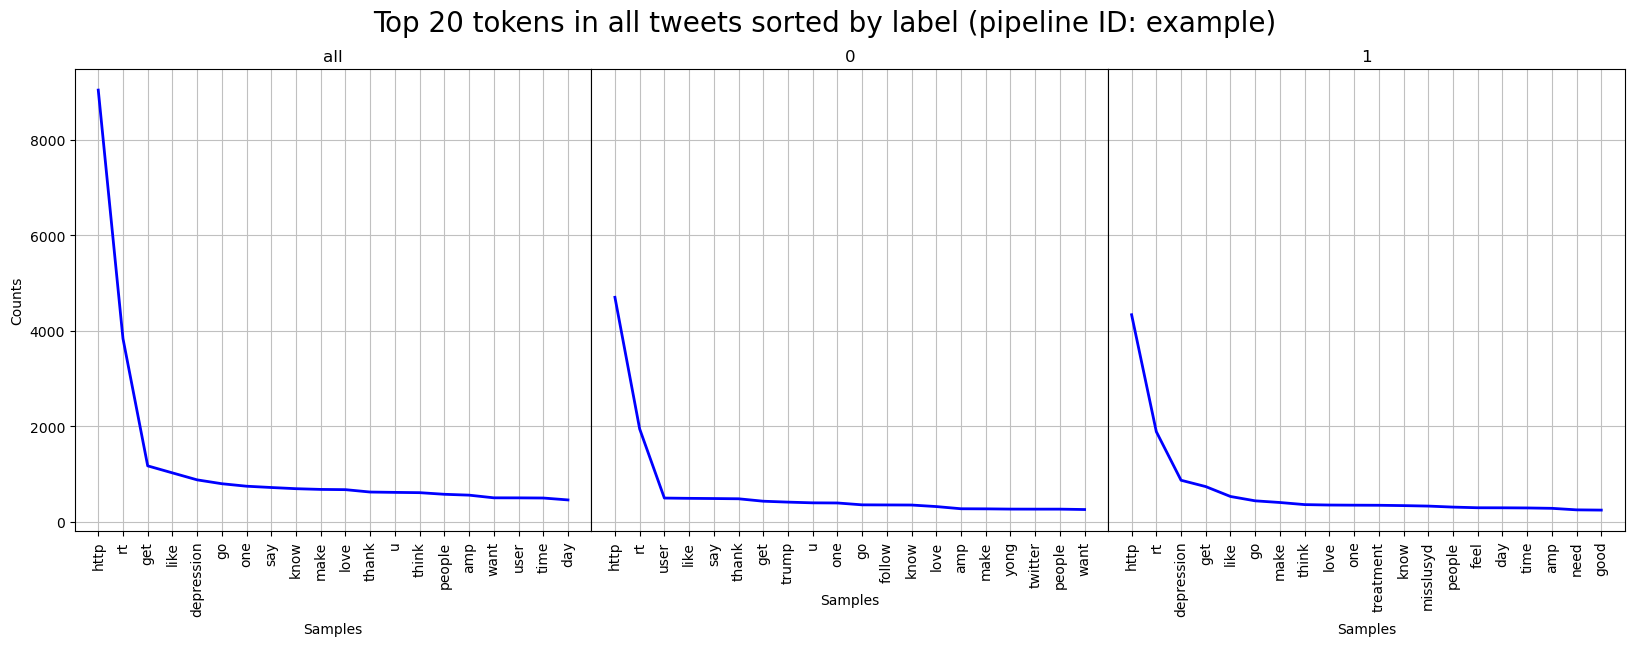

{'all': FreqDist({'http': 9041, 'rt': 3838, 'get': 1174, 'like': 1027, 'depression': 881, 'go': 800, 'one': 748, 'say': 721, 'know': 696, 'make': 681, ...}), 0: FreqDist({'http': 4703, 'rt': 1948, 'user': 500, 'like': 494, 'say': 490, 'thank': 485, 'get': 434, 'trump': 415, 'u': 400, 'one': 397, ...}), 1: FreqDist({'http': 4338, 'rt': 1890, 'depression': 873, 'get': 740, 'like': 533, 'go': 442, 'make': 407, 'think': 363, 'love': 354, 'one': 351, ...})}


In [7]:
dists = example_pipeline.tfd()
print(dists)

In [8]:
print('Total number of tokens:', len(example_pipeline))
print('Number of tokes per label:', example_pipeline.len_per_label())

Total number of tokens: 17750
Number of tokes per label: {'all': 17750, 0: 11451, 1: 10452}


The previous TFD example shows that 'http' and 'rt' are tokens that appear very often in both classes. These tokens are not very informative and will be removed together with the stopwords. We checked the NLTK documentation and found that there is no special list of stopwords for tweets.

#### TFD for different variants of the pipeline
Differences between the variants are the used tokenizer and if stemming or lemmatizing is applied.

In [9]:
stopwords = nltk.corpus.stopwords.words('english') + ['rt', 'http']
pipelines = [
    NLPPipeline(data, nltk.tokenize.word_tokenize, ('stem', nltk.stem.PorterStemmer().stem), stopwords, id='word_tokenize + stem'),
    NLPPipeline(data, nltk.tokenize.word_tokenize, ('lemmatize', nltk.stem.WordNetLemmatizer().lemmatize), stopwords, id='word_tokenize + lemmatize'),
    NLPPipeline(data, nltk.tokenize.TweetTokenizer().tokenize, ('stem', nltk.stem.PorterStemmer().stem), stopwords, id='TweetTokenizer + stem'),
    NLPPipeline(data, nltk.tokenize.TweetTokenizer().tokenize, ('lemmatize', nltk.stem.WordNetLemmatizer().lemmatize), stopwords, id='TweetTokenizer + lemmatize'),
    NLPPipeline(data, nltk.tokenize.TreebankWordTokenizer().tokenize, ('stem', nltk.stem.PorterStemmer().stem), stopwords, id='TreebankWordTokenizer + stem'),
    NLPPipeline(data, nltk.tokenize.TreebankWordTokenizer().tokenize, ('lemmatize', nltk.stem.WordNetLemmatizer().lemmatize), stopwords, id='TreebankWordTokenizer + lemmatize'),    
    NLPPipeline(data, nltk.tokenize.WordPunctTokenizer().tokenize, ('stem', nltk.stem.PorterStemmer().stem), stopwords, id='WordPunctTokenizer + stem'),
    NLPPipeline(data, nltk.tokenize.WordPunctTokenizer().tokenize, ('lemmatize', nltk.stem.WordNetLemmatizer().lemmatize), stopwords, id='WordPunctTokenizer + lemmatize'),
]

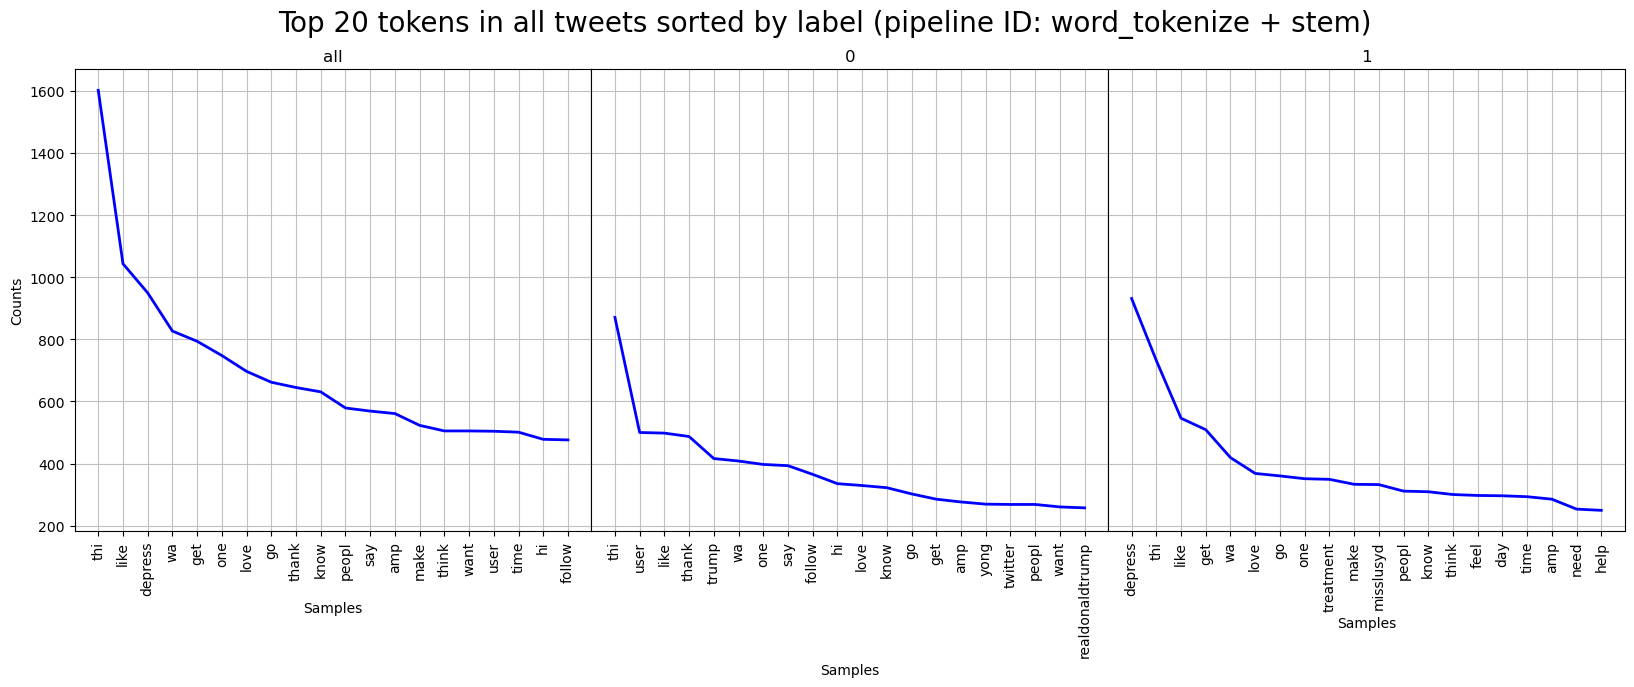

Number of tokes per label: {'all': 16813, 0: 10961, 1: 9967}


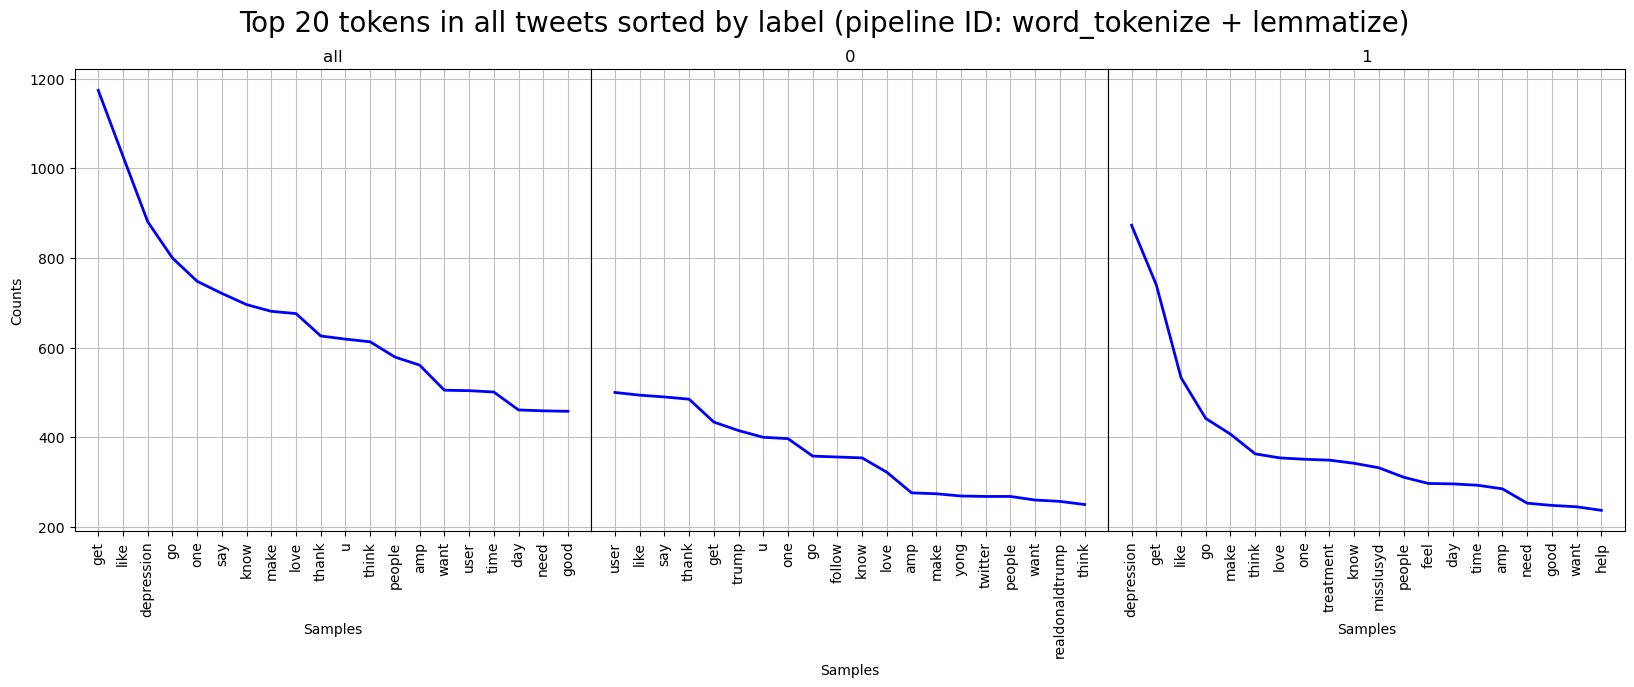

Number of tokes per label: {'all': 17748, 0: 11449, 1: 10450}


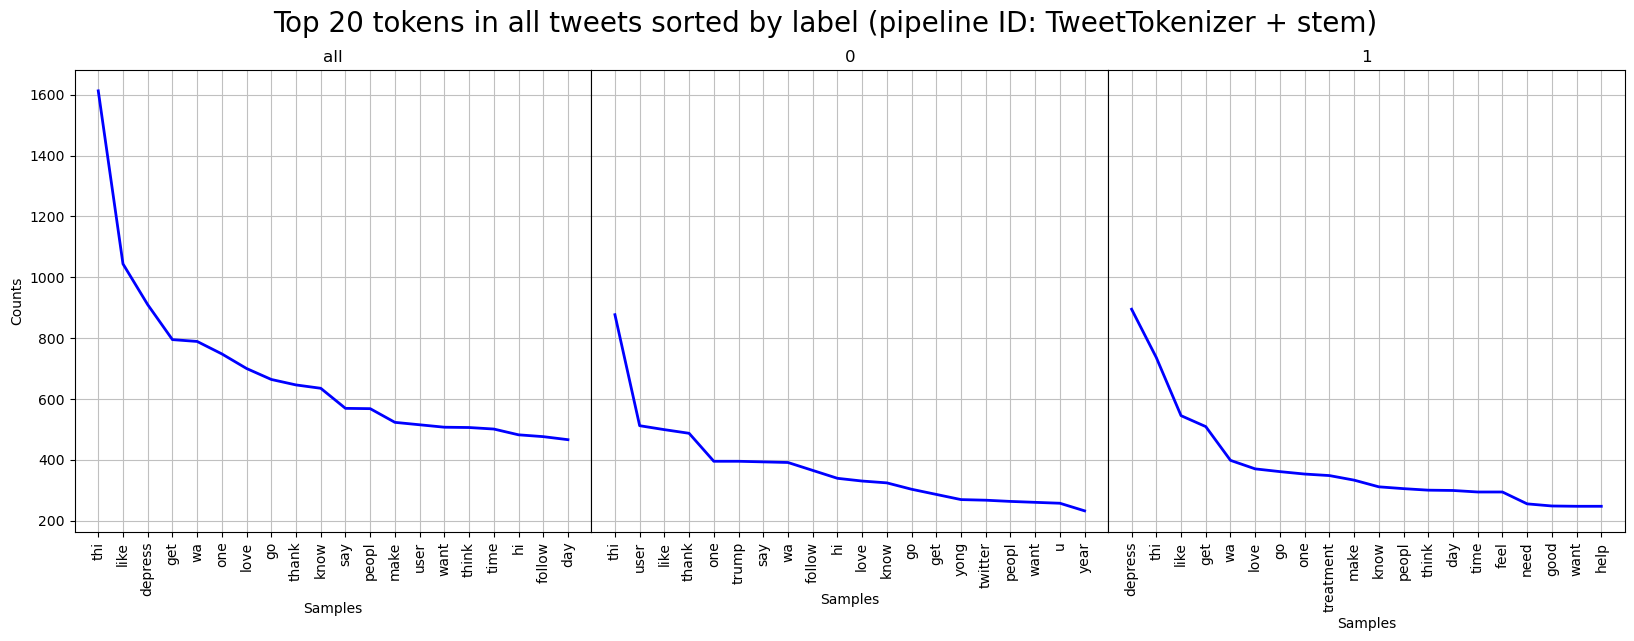

Number of tokes per label: {'all': 13581, 0: 9392, 1: 8279}


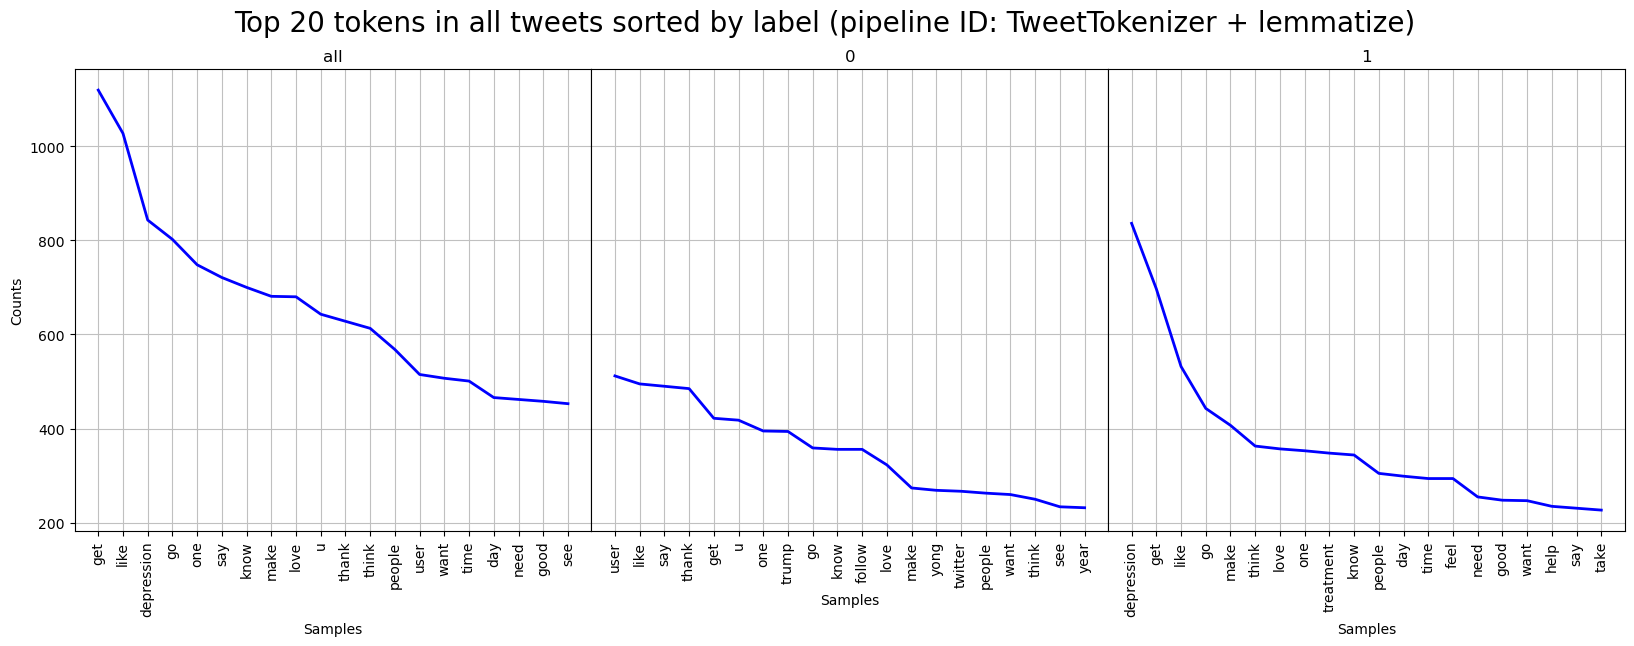

Number of tokes per label: {'all': 14554, 0: 9915, 1: 8767}


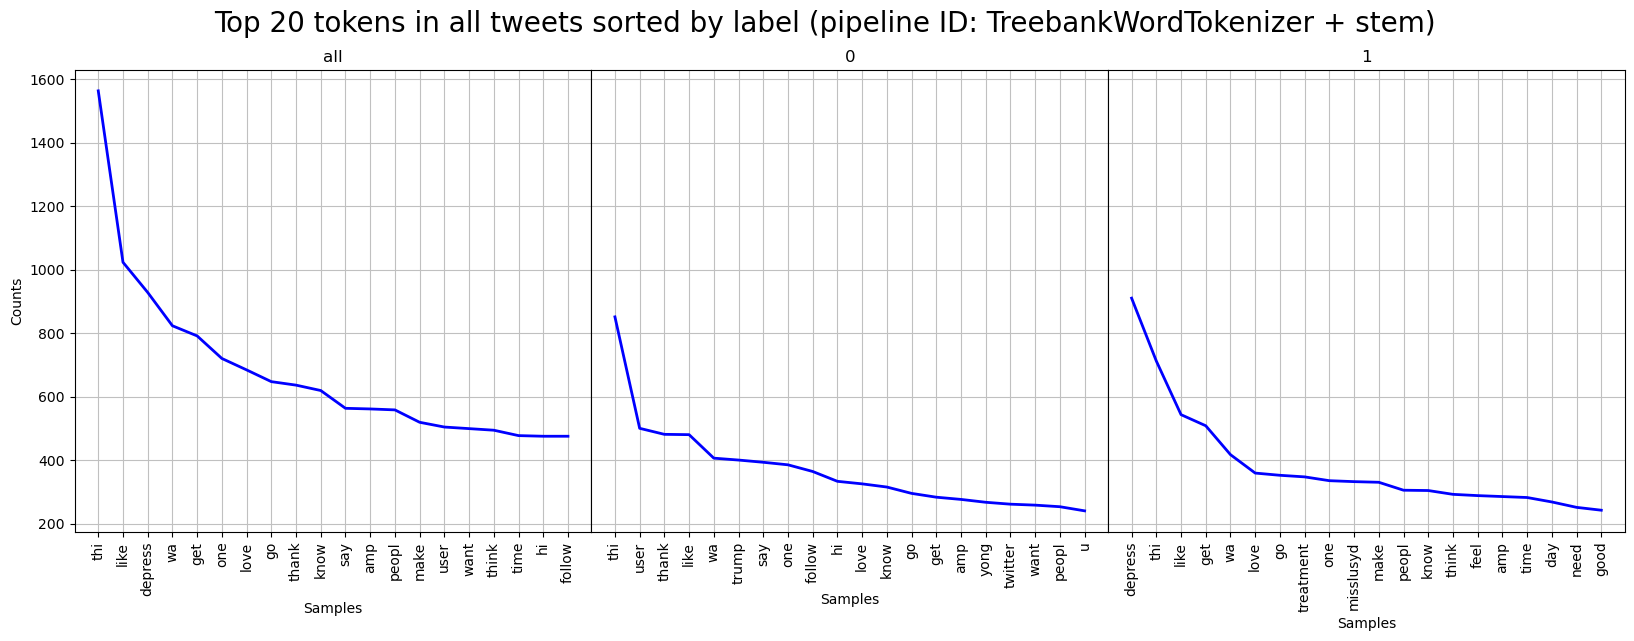

Number of tokes per label: {'all': 16382, 0: 10625, 1: 9729}


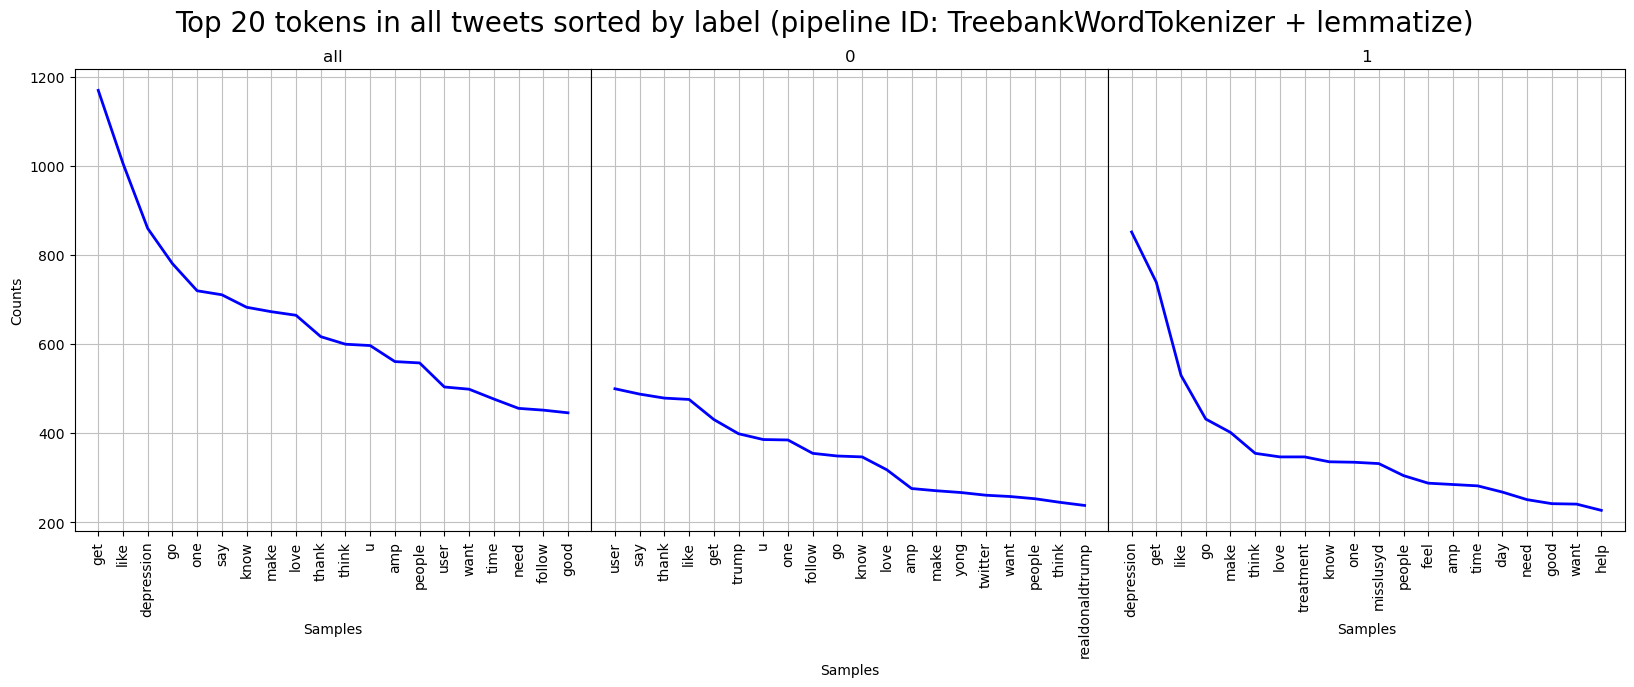

Number of tokes per label: {'all': 17285, 0: 11088, 1: 10193}


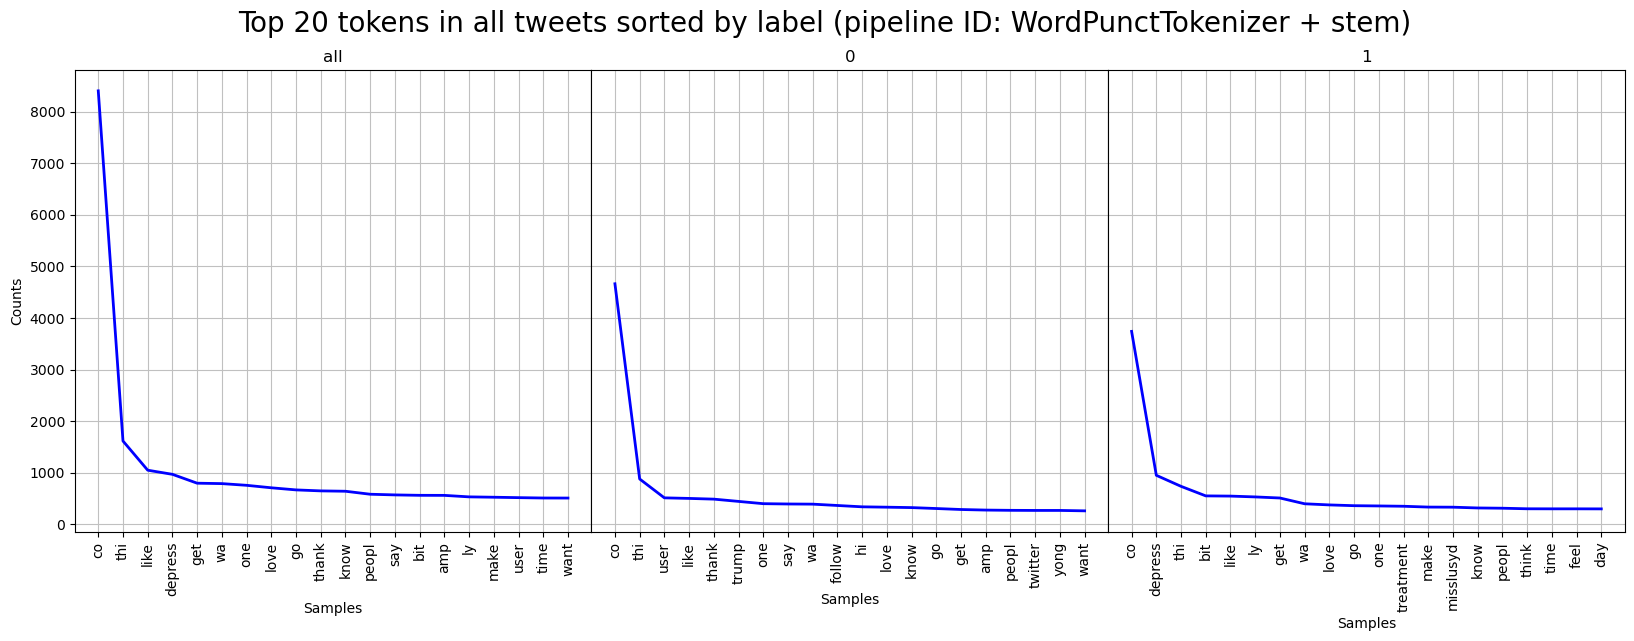

Number of tokes per label: {'all': 18891, 0: 12134, 1: 10992}


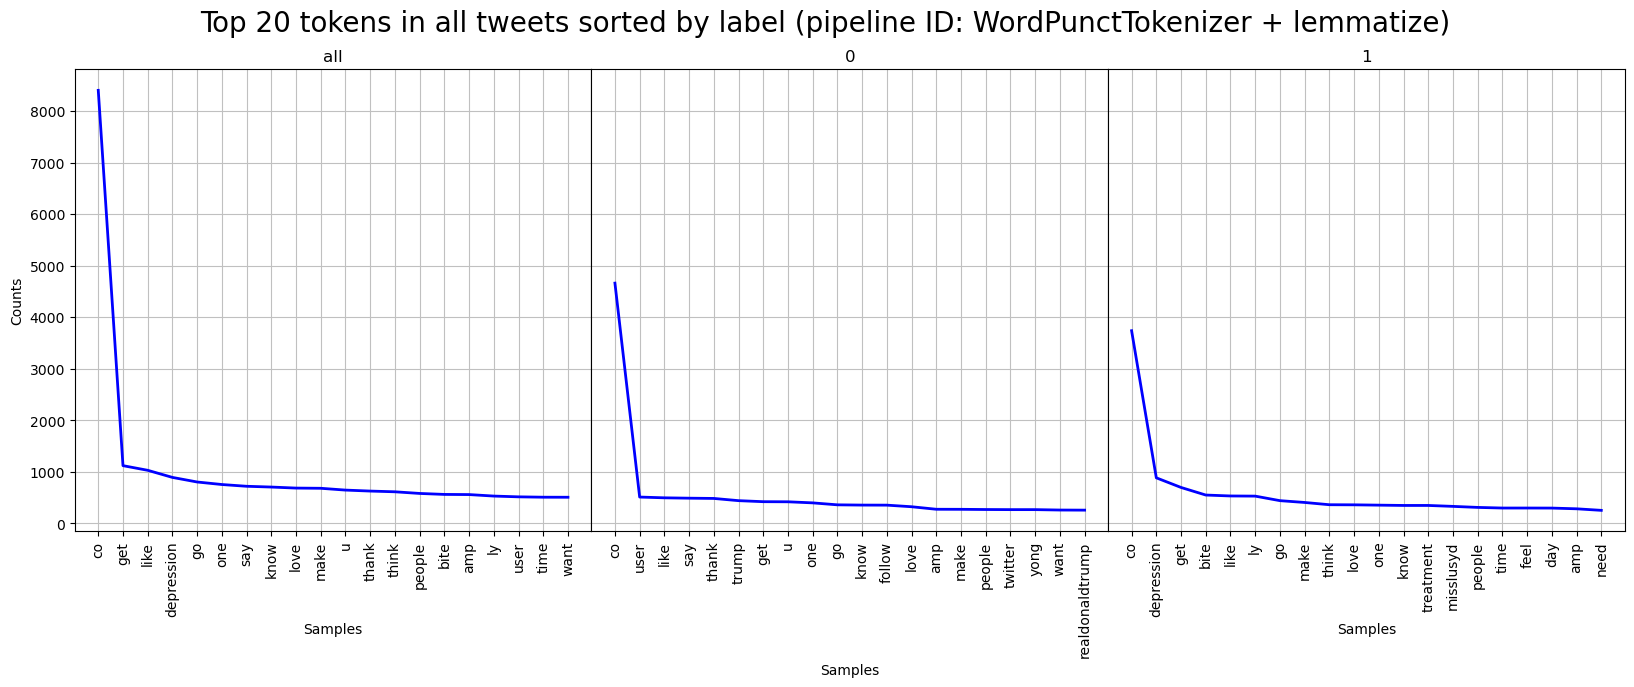

Number of tokes per label: {'all': 19905, 0: 12672, 1: 11506}


In [10]:
for pipeline in pipelines:
    pipeline.process()
    pipeline.tfd()
    print('Number of tokes per label:', pipeline.len_per_label())

Regarding the different tokenizers, it is obvious that the WordPunctTokenizer is not a good choice, as many of the most frequent tokens are part of URLs ('co', 'get'). The TweetTokenizer and the TreeBankTokenizer seem to be the most promising tokenizers. But as we can see in the TFD, the difference between the TreeBankTokenizer and the TweetTokenizer is, that the TreeBankTokenizer splits the words 'don't' and 'can't' into two tokens. The TweetTokenizer seems to be the best choice, as it splits the words correctly and removes the specialities of tweets. However, the actual performance has to be tested first. Regarding stemming and lemmatizing, it is hard to say which one is better. The lemmatizer keeps the tokens readable to a human user, the stemmer has the smaller amount of tokens on average. We will test both variants in the next task of the project and see which one performs better.

### Task 2: Supervised Sentiment Analysis using TF-IDF

Below, one can find an advanced version of the pipeline created in task 1. The pipeline is extended with a new argument vec_clf (list of vectorizer and classifier) aswell as new functions train_test_split(), fit(), predict() and score().

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

class NLPPipeline:
    def __init__(self, data: pd.DataFrame, tokenizer, lemmatizer: tuple, stopwords: list, vec_clf: list = [], text_column='post_text', label_column='label', id=None):
        self.data = data
        self.tokenizer = tokenizer
        self.lemmatize_or_stem = lemmatizer[0]
        self.lemmatizer = lemmatizer[1]
        self.stopwords = stopwords
        self.text_column = text_column
        self.label_column = label_column
        self.id = id
        self.vec_clf_pipeline = None
        if vec_clf:
            assert len(vec_clf) == 2, 'Vectorizer and classifier not passed correctly!'
            self.vec_clf_pipeline = Pipeline([('vec', vec_clf[0]), ('clf', vec_clf[1])])

        self.X_train, self.y_train, self.X_test, self.y_test = None, None, None, None
        self.isfit = False

    def process(self, processes={'tokenize': True, 'normalize': True, 'stopwords': True}): # in order to normalize and/or filter stopwords, the text must be tokenized first
        if processes['tokenize']:
            self.data['processed'] = [self.tokenizer(text) for text in self.data[self.text_column]] # tokenizing
            if processes['normalize']:
                # self.data['processed'] = [[token for token in text if token.isalpha()] for text in self.data['processed']] # removed after Prof. Vogel suggested that isalpha() is not a good idea
                self.data['processed'] = [[token.lower() for token in text] for text in self.data['processed']] # lower casing 
                if self.lemmatize_or_stem == 'lemmatize':
                    self.data['processed'] = [[self.lemmatizer(token, pos='v') for token in text] for text in self.data['processed']] # lemmatizing (verbs)
                    self.data['processed'] = [[self.lemmatizer(token, pos='n') for token in text] for text in self.data['processed']] # lemmatizing (nouns)
                if self.lemmatize_or_stem == 'stem':
                    self.data['processed'] = [[self.lemmatizer(token) for token in text] for text in self.data['processed']] # stemming
            if processes['stopwords']:
                self.data['processed'] = [[token for token in text if token not in self.stopwords] for text in self.data['processed']] # removing stopwords
            self.data['processed'] = [' '.join([token for token in text]) for text in self.data['processed']]
        else:
            self.data['processed'] = self.data[self.text_column]

        return self.data

    def train_test_split(self, test_size=0.3, random_state=None):
        assert 'processed' in self.data.columns, 'The data must be processed first!'
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data['processed'], 
                                                    self.data[self.label_column], 
                                                    test_size=test_size, 
                                                    random_state=random_state)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def fit(self, X=None, y=None):
        assert 'processed' in self.data.columns, 'The data must be processed first!'
        assert self.vec_clf_pipeline is not None, 'No vectorizer and/or classifier passed!'
        if X is None and y is None:
            assert self.X_train is not None, 'Split data into training and test set first!'
            self.vec_clf_pipeline.fit(self.X_train.values, self.y_train.values)
        else:
            self.vec_clf_pipeline.fit(X, y)
        self.isfit = True

    def predict(self, X=None):
        assert self.isfit, 'Fit the classifier first!'
        if X is None:
            return self.vec_clf_pipeline.predict(self.X_test.values)
        else:
            return self.vec_clf_pipeline.predict(X)

    def score(self, X=None, y=None):
        assert self.isfit, 'Fit the classifier first!'
        if X is None and y is None:
            return self.vec_clf_pipeline.score(self.X_test.values, self.y_test.values)
        else:
            return self.vec_clf_pipeline.score(X, y)
        

    def tfd(self, topk=20, showplot = True):
        assert 'processed' in self.data.columns, 'The data must be processed first!'
        text_list = self.data['processed'].tolist()
        token_list = [token for text in text_list for token in text]
        label_list = self.data[self.label_column].tolist()
        label_set = set(label_list)

        distributions = {'all': nltk.FreqDist(token_list)}
        for label in label_set:
            tokens_per_label = []
            for l, t in zip(label_list, text_list):
                if l == label:
                    tokens_per_label.extend(t)
            distributions[label] = nltk.FreqDist(tokens_per_label)

        if showplot:
            nrows = (len(label_set)+1)//4 + 1
            ncols = 3
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows), sharey='row')
            suptitle = f'Top {topk} tokens in all tweets sorted by label'
            if self.id is not None:
                suptitle += f' (pipeline ID: {self.id})'
            fig.suptitle(suptitle, fontsize=20)
            fig.subplots_adjust(wspace=0)
            for i, (label, dist) in enumerate(distributions.items()):
                row = i//ncols
                col = i%ncols
                tokens, counts = [], []
                for token, count in dist.most_common(topk):
                    tokens += [token]
                    counts += [count]
                    if i == 0:
                        axes[i].set_ylabel('Counts')
                    else:
                        axes[i].tick_params(axis='y', length=0)
                axes[i].plot(tokens, counts, linewidth=2, color='b')
                axes[i].grid(True, color='silver')
                axes[i].set_xticks(range(len(tokens)))
                axes[i].set_xticklabels([str(t) for t in tokens], rotation=90)
                axes[i].set_xlabel('Samples')
                axes[i].set_title(f'{label}')
            plt.show()
         
        return distributions

    def __len__(self): # define built-in len function
        assert 'processed' in self.data.columns, 'The data must be processed first!'
        distribution = self.tfd(topk=None, showplot=False)
        return len(distribution['all'].values())

    def len_per_label(self): # return the number of tokens in the dataset for each label (including 'all')
        assert 'processed' in self.data.columns, 'The data must be processed first!'
        distribution = self.tfd(topk=None, showplot=False)
        return {label: len(distribution[label].values()) for label in distribution.keys()}
        

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

stopwords = nltk.corpus.stopwords.words('english') + ['rt', 'http']
tfidf = TfidfVectorizer()
mnb = MultinomialNB()

# Example pipelines
example_pipeline_1 = NLPPipeline(data, nltk.tokenize.TweetTokenizer().tokenize, ('lemmatize', nltk.stem.WordNetLemmatizer().lemmatize), stopwords, [tfidf, mnb], id='example lemm.')
example_pipeline_2 = NLPPipeline(data, nltk.tokenize.TweetTokenizer().tokenize, ('stem', nltk.stem.PorterStemmer().stem), stopwords, [tfidf, mnb], id='example stem')
example_pipelines = [example_pipeline_1, example_pipeline_2]

In [13]:
import time as tt

for pipe in example_pipelines:
    start = tt.time()
    pipe.process()
    print(f'Processing time ({pipe.id}): {tt.time()-start:.1f} s')
    pipe.train_test_split(random_state=42)
    pipe.fit()
    acc = pipe.score()
    print(f'Accuracy ({pipe.id}): {acc:.1%}\n')

Processing time (example lemm.): 13.2 s
Accuracy (example lemm.): 87.7%

Processing time (example stem): 20.7 s
Accuracy (example stem): 87.9%



The example pipelines show that lemmatizing and stemming yield almost the same accuracies when predicting the sentiments. However, lemmatizing is a bit faster than stemming. As the difference in processing time is not large, we will use the stemming in all pipelines for the rest of the project together with the TweetTokenizer. The function isalpha() for removing punctuation is not a good idea, so we removed it, as suggested by Prof. Vogel. When isalpha() is included, the accuracies drop to ~76%.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

tok = nltk.tokenize.TweetTokenizer().tokenize
stem = ('stem', nltk.stem.PorterStemmer().stem)
tfidf = TfidfVectorizer()

# Pipelines with different classifiers
ids = ['RF', 'LR', 'NB', 'KNN', 'MLP', 'SVM']
classifiers = [RandomForestClassifier(), LogisticRegression(), MultinomialNB(), KNeighborsClassifier(), MLPClassifier(), SVC()]

pipelines = [NLPPipeline(data, tok, stem, stopwords, [tfidf, clf], id=id) for clf, id in zip(classifiers, ids)]

In [15]:
for pipe in pipelines:
    start = tt.time()
    pipe.process()
    pipe.train_test_split(random_state=42) # same training and test sets for all pipelines
    pipe.fit()
    acc = pipe.score()
    print(f'Accuracy for pipe "{pipe.id}": {acc:.1%} (in {tt.time()-start:.1f} s)')

Accuracy for pipe "RF": 85.1% (in 162.1 s)
Accuracy for pipe "LR": 85.8% (in 27.1 s)
Accuracy for pipe "NB": 87.9% (in 27.3 s)
Accuracy for pipe "KNN": 55.1% (in 31.5 s)
Accuracy for pipe "MLP": 86.8% (in 702.4 s)
Accuracy for pipe "SVM": 87.6% (in 66.1 s)


We can see that the accuracies are similar for all classifiers, except the kNN-classifier. However, some classifiers are much faster than others. The best performance considering the accuracy and the speed is achieved by the Multinomial Naive Bayes classifier. By tuning the hyperparametes of all the classifiers, it would be possible to lift the accuracy further. As tuning the hyperparameters takes some time, we allowed ourselves to skip this part, as we've already shown that we can reach an acceptable accuracy with the default hyperparameters. In the next step, we show how much pre-processing the data improves the accuracy of the classifier compared to using no pre-processing.

In [16]:
# Comparison of pre-processing vs. no processing
w_pre = NLPPipeline(data, tok, stem, stopwords, [tfidf, MultinomialNB()], id='w/ pre-processing')
wo_pre = NLPPipeline(data, None, (None, None), None, [tfidf, MultinomialNB()], id='w/o pre-processing')

w_pre.process()
w_pre.train_test_split(random_state=42)
w_pre.fit()
w_pre_score = w_pre.score()
print(f'Accuracy with pre-processing: {w_pre_score:.1%}')

wo_pre.process(processes={'tokenize': False, 'normalize': False, 'stopwords': False})
wo_pre.train_test_split(random_state=42)
wo_pre.fit()
wo_pre_score = wo_pre.score()
print(f'Accuracy without pre-processing: {wo_pre_score:.1%}')

Accuracy with pre-processing: 87.9%
Accuracy without pre-processing: 87.4%


When no pre-processing is used, the accuracy drops a little bit. This is a bit surprising as the TF-IDF vectorization usually strongly depends on pre-processing.

### Task 3: NER
It is not necessary to run the above cells to run the cells below.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

pd.set_option('display.max_colwidth', None)

In [18]:
import spacy
from spacy import displacy

# spacy.prefer_gpu() # use GPU if available --> throws an error

nlp = spacy.load('en_core_web_sm')

In [19]:
raw_ner = pd.read_csv('data/Mental-Health-Twitter.csv', index_col=0)
data_ner = raw_ner.drop(columns=['post_id','post_created','user_id','followers', 'friends', 'favourites', 'statuses', 'retweets'])

display(data_ner.head())

,post_text,label
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1
2,Awake but tired. I need to sleep but my brain has other ideas...,1
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1


In [20]:
tweet_docs = [nlp(tweet) for tweet in data_ner['post_text'][:20]] # Apply NER to the first 20 tweets

In [21]:
# Print them
for i, tweet in enumerate(tweet_docs):
    print(15*'-' + f' Tweet {i+1} ' + 15*'-')
    displacy.render(tweet, style='ent')
    print(' ')

--------------- Tweet 1 ---------------


 
--------------- Tweet 2 ---------------


 
--------------- Tweet 3 ---------------


c:\Users\yanis\anaconda3\envs\nlp\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


 
--------------- Tweet 4 ---------------


 
--------------- Tweet 5 ---------------


 
--------------- Tweet 6 ---------------


 
--------------- Tweet 7 ---------------


 
--------------- Tweet 8 ---------------


 
--------------- Tweet 9 ---------------


 
--------------- Tweet 10 ---------------


 
--------------- Tweet 11 ---------------


 
--------------- Tweet 12 ---------------


 
--------------- Tweet 13 ---------------


 
--------------- Tweet 14 ---------------


 
--------------- Tweet 15 ---------------


 
--------------- Tweet 16 ---------------


 
--------------- Tweet 17 ---------------


 
--------------- Tweet 18 ---------------


 
--------------- Tweet 19 ---------------


 
--------------- Tweet 20 ---------------


In [22]:
# Add new entities/patterns
nlp = spacy.load('en_core_web_sm')

patterns = [{'label': 'USERNAME', 'pattern': [{'TEXT': {'REGEX': '@[a-zA-Z0-9_]+'}}]},
            {'label': 'HASHTAG', 'pattern': [{'TEXT': '#'}, {'TEXT': {'REGEX': '[a-zA-Z0-9_]+'}}]},
            {'label': 'URL', 'pattern': [{'TEXT': {'REGEX': 'https?://[a-zA-Z0-9./]+'}}]}
            ]
ruler = nlp.add_pipe('entity_ruler', before='ner') # add entity ruler before default NER
ruler.add_patterns(patterns)

example = nlp('Hello @timgraf! https://www.timgraf.de #nlp #MURATandJUERGEN4life')
displacy.render(example, style='ent')

In [23]:
# Get evaluation tweets
nlp_standard = spacy.load('en_core_web_sm')

nlp_custom = spacy.load('en_core_web_sm')
patterns = [{'label': 'USERNAME', 'pattern': [{'TEXT': {'REGEX': '@[a-zA-Z0-9_]+'}}]},
            {'label': 'HASHTAG', 'pattern': [{'TEXT': '#'}, {'TEXT': {'REGEX': '[a-zA-Z0-9_]+'}}]},
            {'label': 'URL', 'pattern': [{'TEXT': {'REGEX': 'https?://[a-zA-Z0-9./]+'}}]}
            ]
ruler = nlp_custom.add_pipe('entity_ruler', before='ner') # add entity ruler before default NER
ruler.add_patterns(patterns)

# We created a file ner_examples.txt with 60 randomly chosen tweets from the dataset
with open('data/ner_examples.txt', 'r', encoding="utf8") as f:
    sample_tweets = f.readlines()
    sample_tweet_docs_standard = [nlp_standard(tweet) for tweet in sample_tweets]
    sample_tweet_docs_custom = [nlp_custom(tweet) for tweet in sample_tweets]

In [24]:
displacy.render(sample_tweet_docs_standard[0], style='ent')
displacy.render(sample_tweet_docs_custom[0], style='ent')

In [25]:
# Get spans of entities
def get_spans(doc):
    spans = []
    for ent in doc.ents:
        spans.append([ent.start_char, ent.end_char, ent.label_])
    return spans

standard_spans = [get_spans(tweet) for tweet in sample_tweet_docs_standard]
custom_spans = [get_spans(tweet) for tweet in sample_tweet_docs_custom]

print(standard_spans[9]) # example

[[0, 14, 'PERSON'], [51, 55, 'ORG']]


In [26]:
# Get entities from JSON file
def get_json_spans(json_file):
    import json

    with open(json_file, 'r', encoding="utf8") as f:
        annotations_standard = json.load(f)['annotations']

    spans = []
    for item in annotations_standard:
        spans.append(item[1]['entities'])

    return spans

standard_spans_gt = get_json_spans('data/annotations_standard.json') # ground truth
custom_spans_gt = get_json_spans('data/annotations_custom.json') # ground truth

print(standard_spans_gt) # example

[[[52, 54, 'CARDINAL']], [], [[35, 40, 'DATE'], [73, 79, 'PERSON'], [95, 100, 'PERSON']], [], [], [], [], [], [[19, 21, 'CARDINAL'], [131, 132, 'CARDINAL']], [], [[63, 80, 'TIME']], [], [], [[20, 30, 'TIME']], [[27, 30, 'PERSON'], [35, 41, 'PERSON'], [42, 45, 'PERSON'], [50, 55, 'PERSON'], [61, 64, 'PERSON'], [69, 74, 'PERSON'], [75, 82, 'TIME']], [[20, 26, 'TIME'], [47, 48, 'CARDINAL'], [52, 54, 'CARDINAL']], [], [], [], [[23, 35, 'NORP'], [40, 46, 'NORP'], [64, 70, 'NORP'], [75, 87, 'NORP']], [], [[45, 58, 'WORK OF ART']], [], [[46, 53, 'NORP']], [], [[39, 46, 'ORG']], [], [[33, 52, 'PERSON']], [[0, 3, 'PERSON'], [5, 21, 'ORG'], [73, 76, 'ORG'], [95, 99, 'DATE']], [[50, 71, 'ORG']], [[0, 20, 'ORG']], [], [[9, 20, 'TIME'], [21, 29, 'DATE']], [], [], [], [], [[0, 54, 'WORK OF ART']], [[0, 13, 'PERSON'], [37, 44, 'ORG'], [56, 69, 'PERSON']], [[54, 61, 'TIME'], [62, 65, 'PERSON']], [[10, 22, 'NORP'], [29, 33, 'PERCENT'], [52, 57, 'PERSON'], [59, 62, 'PERCENT'], [66, 69, 'ORG'], [76, 81, 

In [27]:
def is_close(span, span_gt): # check if span is close to ground truth span. Ground truth sometimes also includes punctuation.
    if span[0] == span_gt[0] and span[2] == span_gt[2]:
        if abs(span[1] - span_gt[1]) < 2:
            return True
    return False

def ner_evaluation(spans, spans_gt):
    tp, fp, fn = 0, 0 ,0
    for tweet, tweet_gt in zip(spans, spans_gt):
        for span in tweet:
            for span_gt in tweet_gt:
                if is_close(span, span_gt):
                    tp += 1
                    break
            else:
                fp += 1
        for span_gt in tweet_gt:
            for span in tweet:
                if is_close(span, span_gt):
                    break
            else:
                fn += 1
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return {'precision': precision, 'recall': recall, 'counts': [tp, fp, fn]}


In [28]:
eval_standard = ner_evaluation(standard_spans, standard_spans_gt)
eval_custom = ner_evaluation(custom_spans, custom_spans_gt)

# Sanity checks
assert sum(len(tweet) for tweet in standard_spans) == eval_standard['counts'][0] + eval_standard['counts'][1]
assert sum(len(tweet) for tweet in custom_spans) == eval_custom['counts'][0] + eval_custom['counts'][1]
assert sum(len(tweet) for tweet in standard_spans_gt) == eval_standard['counts'][0] + eval_standard['counts'][2]
assert sum(len(tweet) for tweet in custom_spans_gt) == eval_custom['counts'][0] + eval_custom['counts'][2]

print(eval_standard)
print(eval_custom)

{'precision': 0.3548387096774194, 'recall': 0.515625, 'counts': [33, 60, 31]}
{'precision': 0.7808219178082192, 'recall': 0.7755102040816326, 'counts': [114, 32, 33]}


In [29]:
print('Standard NER:')
print(15*'-')
print(f'Precision: {eval_standard["precision"]:.2%}')
print(f'Recall: {eval_standard["recall"]:.2%}')

print(' ')
print('Custom NER:')
print(15*'-')
print(f'Precision: {eval_custom["precision"]:.2%}')
print(f'Recall: {eval_custom["recall"]:.2%}')


Standard NER:
---------------
Precision: 35.48%
Recall: 51.56%
 
Custom NER:
---------------
Precision: 78.08%
Recall: 77.55%


#### How could NER type information help in other NLP use cases?

NER is a very useful tool for many NLP tasks.  For example, it is a prerequisite task for Named Entity Linking, where many references to the same entity within a text should be identified. In many languages, Named Entities often follow different rules for spelling, so this is also important e.g. for Spellcheckers, s.t. Named Entites are not autocorrectet to lowercase or similar.

### Task 4: Bert
It is not necessary to run the above cells to run the cells below.
We will run BERT in a dedicated bert.py-file on the ubelix server. bert.py is in the same folder as this notebook. The output of bert.py is saved in the files bert_output_train.json as well as bert_output_test.json, whereas the state of the model with tuned classifier can be retrieved in bert_model_ft.pt (provided upon request, as it is a very large file). The following cells will load the output ot the training and the evaluation of the sentiment analysis done in bert.py. The same applies for DistilBERT, which we also tried (in this case bert is replaced by distilbert in the filenames).

In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt

##### BERT

In [31]:
with open('output/bert_output_train.json', 'r') as f:
    train_dict = json.load(f)
with open('output/bert_output_test.json', 'r') as f:
    test_dict = json.load(f)

print(train_dict.keys())
print(test_dict.keys())

dict_keys(['training_loss', 'accuracy', 'precision', 'recall', 'f1', 'n_epochs'])
dict_keys(['accuracy', 'precision', 'recall', 'f1'])


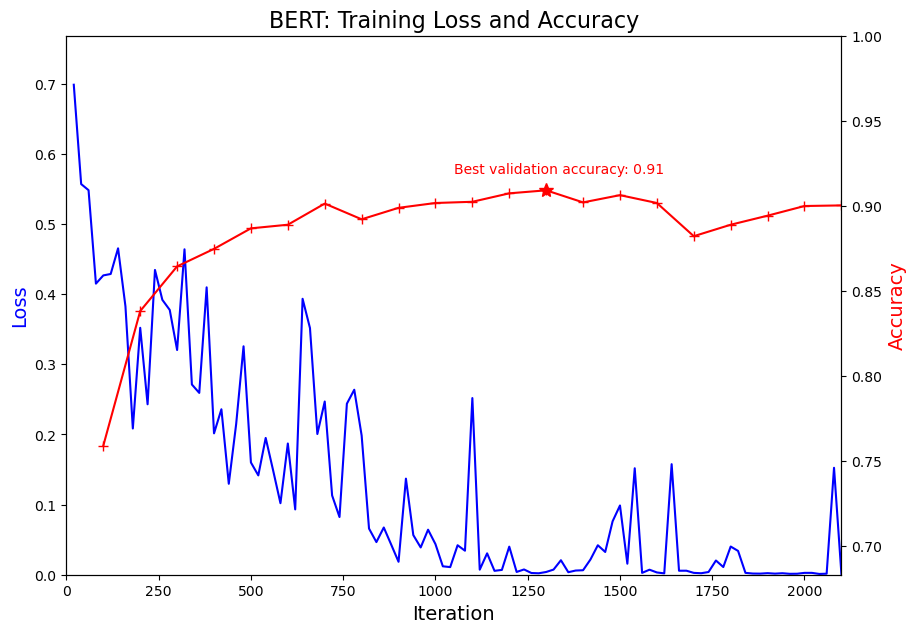

In [32]:
# Plot TRAINING loss and accuracy
it_loss = [item[0] for item in train_dict['training_loss']]
loss = [item[1] for item in train_dict['training_loss']]
it_acc = [item[0] for item in train_dict['accuracy']]
acc = [item[1] for item in train_dict['accuracy']]


fig = plt.figure(figsize=(10,7))
ax1 = fig.gca()
ax2 = ax1.twinx()

plt.title('BERT: Training Loss and Accuracy', fontsize=16)

ax1.set_xlim(0, it_loss[-1])
ax1.set_xlabel('Iteration', fontsize=14)

ax1.plot(it_loss, loss, 'b', label='Training Loss')
ax1.set_ylim(0, 1.1*max(loss))
ax1.set_ylabel('Loss', color='b', fontsize=14)

ax2.plot(it_acc, acc, 'r-+', label='Training Accuracy', markersize=7)
ax2.set_ylim(0.9*min(acc), 1.1*max(acc))
ax2.set_ylabel('Accuracy', color='r', fontsize=14)

best_acc_idx = acc.index(max(acc))
ax2.plot(it_acc[best_acc_idx], max(acc), 'r*', markersize=10)
ax2.annotate(f'Best validation accuracy: {max(acc):.2f}', (it_acc[best_acc_idx], max(acc)), xytext=(it_acc[best_acc_idx]-250, max(acc)+0.01), color='r')

plt.show()

In [33]:
# Print TEST accuracy, precision, recall and f1-score
acc = test_dict['accuracy']
pre = test_dict['precision']
rec = test_dict['recall']
f1  = test_dict['f1']

print('Test results for BERT Sentiment Analysis:')
print(41*'-')
print(f'Accuracy:  {acc:.3f}')
print(f'Precision: {pre:.3f}')
print(f'Recall:    {rec:.3f}')
print(f'F1-score:  {f1:.3f}')

Test results for BERT Sentiment Analysis:
-----------------------------------------
Accuracy:  0.907
Precision: 0.916
Recall:    0.895
F1-score:  0.902


Using a pre-trained BERT model we were able to boost the accuracy of the sentiment analysis from 87.9% in task 2 to 90.7% in task 4. While the imporvement in accuracy is 2.8%, the computational resources needed to train the model are much higher than in task 2, which means that the model cannot be trained in a reasonable time on a normal computer. This is a trade-off that has to be considered when using BERT. The same applies to DistilBERT below.

##### DistilBERT

In [34]:
with open('output/distilbert_output_train.json', 'r') as f:
    train_dict = json.load(f)
with open('output/distilbert_output_test.json', 'r') as f:
    test_dict = json.load(f)

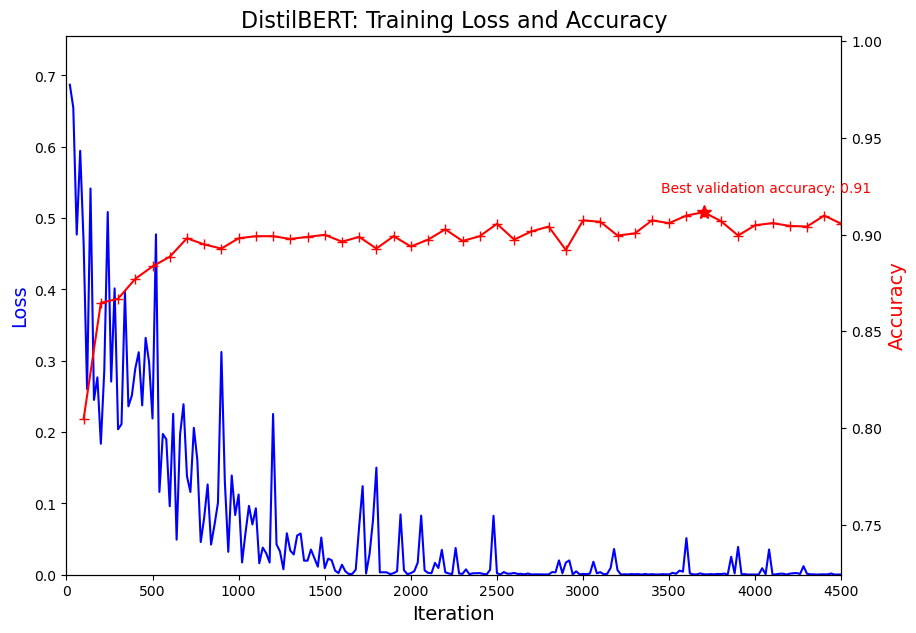

In [35]:
# Plot TRAINING loss and accuracy
it_loss = [item[0] for item in train_dict['training_loss']]
loss = [item[1] for item in train_dict['training_loss']]
it_acc = [item[0] for item in train_dict['accuracy']]
acc = [item[1] for item in train_dict['accuracy']]


fig = plt.figure(figsize=(10,7))
ax1 = fig.gca()
ax2 = ax1.twinx()

plt.title('DistilBERT: Training Loss and Accuracy', fontsize=16)

ax1.set_xlim(0, it_loss[-1])
ax1.set_xlabel('Iteration', fontsize=14)

ax1.plot(it_loss, loss, 'b', label='Training Loss')
ax1.set_ylim(0, 1.1*max(loss))
ax1.set_ylabel('Loss', color='b', fontsize=14)

ax2.plot(it_acc, acc, 'r-+', label='Training Accuracy', markersize=7)
ax2.set_ylim(0.9*min(acc), 1.1*max(acc))
ax2.set_ylabel('Accuracy', color='r', fontsize=14)

best_acc_idx = acc.index(max(acc))
ax2.plot(it_acc[best_acc_idx], max(acc), 'r*', markersize=10)
ax2.annotate(f'Best validation accuracy: {max(acc):.2f}', (it_acc[best_acc_idx], max(acc)), xytext=(it_acc[best_acc_idx]-250, max(acc)+0.01), color='r')

plt.show()

In [36]:
# Print TEST accuracy, precision, recall and f1-score
acc = test_dict['accuracy']
pre = test_dict['precision']
rec = test_dict['recall']
f1  = test_dict['f1']

print('Test results for BERT Sentiment Analysis:')
print(41*'-')
print(f'Accuracy:  {acc:.3f}')
print(f'Precision: {pre:.3f}')
print(f'Recall:    {rec:.3f}')
print(f'F1-score:  {f1:.3f}')


Test results for BERT Sentiment Analysis:
-----------------------------------------
Accuracy:  0.914
Precision: 0.935
Recall:    0.893
F1-score:  0.911


DistilBERT yields slightly higher values for accuracy, precision and F1-score than BERT. The recall is slightly lower.

### Discussion & Outlook

In task 2 we saw that performance is better with the stemmer than with the lemmatizer. While in theory lemmatization should lead to better results, the task of lemmatization is quite hard and usually solved with lookup tables. Lookup tables work fine with known words, but for unknown words, lemmatization often fails, which then in turn decreases performance. In contrast, stemming rules might sometimes destroy information, but they perform the task equally well whether a word is new or known.

Further possible improvements to our task 4 would be to finetune BERT or DistilBERT on the task data before training the classification layer. Also, weak supervision would be a possibility to further expand our dataset, which is rather small with 10k tweets per class. However, we assume that it would be quite difficult to find a significant amount of tweets that we can classify as depressed, and we don't want to bring an imbalance to our dataset. That's why we did not try to experiment with weak supervision.